In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
os.chdir("F:\\Vibhuti\\business analytics and intelligence\\Internshala\\internshipwork_grip")
df = pd.read_csv('internshipwork_grip.csv')

In [2]:
df.head(3)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27


In [3]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


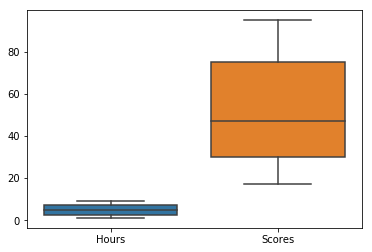

In [4]:
sns.boxplot(data = df)

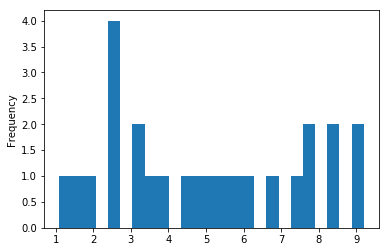

In [5]:
df['Hours'].plot.hist(bins = 25)

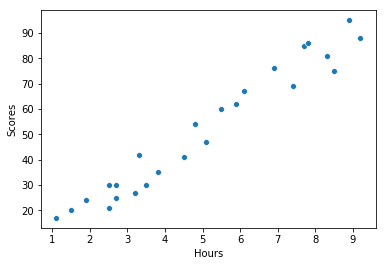

In [6]:
sns.scatterplot(x = df['Hours'], y = df['Scores'], data = df)

# Finding the null values

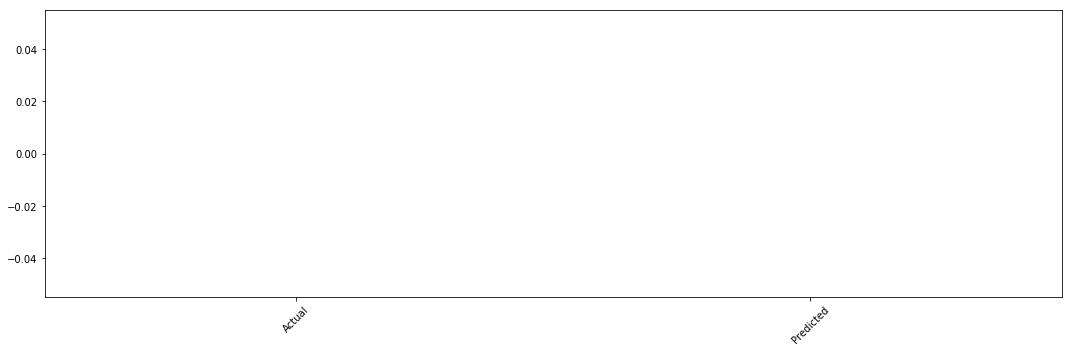

In [35]:
###Visualizing the NULL or NA pr NAN values
fig, ax = plt.subplots(figsize = (15,5))
x = df.isna().sum().index
y = df.isna().sum()
ax.bar(x=x, height = y)
ax.set_xticklabels(x, rotation = 45)
plt.tight_layout()

# Finding the outliers

In [ ]:
Q1 = np.percentile(df['Hours'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(df['Hours'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(df['Hours'], 75, interpolation = 'midpoint') 
IQR = Q3-Q1
print('Interquartile range is', IQR) 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR 
print('low_limit is', low_lim) 
print('up_limit is', up_lim)
outlier =[] 
for x in df['Hours']: 
    if ((x> up_lim) or (x<low_lim)): 
         outlier.append(x) 
print(' outlier in the dataset is', outlier) 

In [ ]:
Q1 = np.percentile(df['Scores'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(df['Scores'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(df['Scores'], 75, interpolation = 'midpoint') 
IQR = Q3-Q1
print('Interquartile range is', IQR) 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR 
print('low_limit is', low_lim) 
print('up_limit is', up_lim)
outlier =[] 
for x in df['Scores']: 
    if ((x> up_lim) or (x<low_lim)): 
         outlier.append(x) 
print(' outlier in the dataset is', outlier) 

df.isnull().sum()

sns.pairplot(data = df)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
linreg = LinearRegression()

# Slicing the data

In [10]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

# Splitting the data

In [11]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

#Training the model

In [12]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


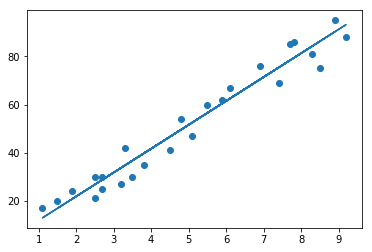

In [13]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [14]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scoress

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


Comparing the actual vs predicted

In [15]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Finding the inercepts and coefficients

In [16]:
print(regressor.coef_)

[9.91065648]


In [17]:
print(regressor.intercept_)

2.018160041434683


# Predicting with our desired value

In [18]:
y = (9.91065648*9.25)+2.018160041434683
y

93.69173248143468

#                                            OR

# Predicting with our desired value

In [26]:
hours = np.array([9.25])
hours = hours.reshape(-1,1)
predictedvalue = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(predictedvalue[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


# Evaluating the model

In [24]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


In [27]:
from sklearn.metrics import r2_score

In [28]:
r2_score(y_test, y_pred)

0.9454906892105356

In [30]:
from sklearn.metrics import mean_squared_error

In [31]:
mean_squared_error(y_test, y_pred)

21.5987693072174

In [32]:
from sklearn.metrics import mean_absolute_error

In [33]:
mean_absolute_error(y_test, y_pred)

4.183859899002975